Problem Description



```
This notebook will classify Iris samples using an artificial neural network constructed using R packages
```

Data

```
The iris data set contains 150 samples (rows) with five columns
The first four columns contain the independent variables (input data), ie. the flower measurements:
  - Sepal length
  - Sepal width
  - Petal length
  - Petal width

The last column contains the output class setosa, versicolor, and virginica
```

ANN Model

```
The ANN will have four input neurons, one for each feature, a hidden layer of 3 neurons (can be changed), and three output neurons, one for each class

An ANN is created and trained on a random sample of 100 rows and tested on the remaining 50 samples. 

When performing the predictions (testing), each output neuron will output a number between 0 and 1, the sum of all predictions is 1 
These predictions are then binarized according to the highest prediction:

                   setosa      versicolor      virginica
Raw Predictions     0.2           0.2            0.6
Binarized            0             0              1
Predicted Class: virginica
```

Measuring Performance

```
Performance on the test set is quantified using a confusion matrix

https://dev.to/overrideveloper/understanding-the-confusion-matrix-264i

A function is implemented to predict the class of a set of user-entered measurements 



```


<font color='blue'>Cell 1
Importing libraries

In [ ]:
## Upload data from Module 7 data folder: 

# data1.csv 

# Note, make sure not to upload the data1.csv from Module 2

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<font color='blue'>Cell 2
Reading the data

In [11]:
#read data from csv
iris = pd.read_csv("data1.csv")
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<font color='blue'>Cell 3
Dataset verification

In [12]:
#Check the dataset to make sure no data is missing and Check the class labels
def verify_dataset(data):
  #if any of the rows have missing value return datas missing
  data_found = 1
  #Iterate over each column
  for each_column in data.columns:
    #If any column has null values, a message is printed
    if data[each_column].isnull().any():
            print("Data missing in Column " + each_column)
            #if any rows are not missing return Dataset is complete. No missing value
            quit()
    #If no nulls are found, print the corresponding message
    if data_found == 1:
        print("Dataset is complete. No missing values")
    return

#Running the above function on the iris data set
verify_dataset(iris)

Dataset is complete. No missing values


In [13]:
#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    
    return X / np.expand_dims(l2, axis)


<font color='blue'>Cell 4
One hot encoding function

In [14]:
#This function accepts an array of categorical variables and returns the one hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

<font color='blue'>Cell 5
Selecting features from a list

In [15]:
#Selecting the features that will be used for training and testing
#Changing the values allows the user to see the impact of omitting certain features

'''Change the values below'''
sepal_length = True
sepal_width = True
petal_length = True
petal_width = True
'''Change the values above'''

feature_list = [sepal_length,sepal_width,petal_length,petal_width]

<font color='blue'>Cell 6
Selecting features and running the normalization function

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Using sklearn to perform normalization
sc = StandardScaler()
#Performing the scaling on the training and test sets


#Specifying the columns that contain the independent variables (inputs)
columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
#Extracting the independent variables from the data set
x = pd.DataFrame(iris, columns=columns)
#print(x[:5])
x = x.to_numpy()

x = x[:,feature_list]
#print( 'feature list')
mean = x[:,0].mean()
print(mean)
print(x[:5])
#print(x[:,0])
#Normalizing the data
x = sc.fit_transform(x)
#print( 'Normalizing the data')
#print(x[2:5])
mean1 = x[:,0].mean()
print(mean1)


5.843333333333334
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
-4.736951571734001e-16


<font color='blue'>Cell 7
Labelling output data and applying one hot encoding

In [17]:
#Creating a dictionary that relates each species to a label (integer)
label_dict = dict()
label_dict['0'] = 'setosa'
label_dict['1'] = 'virginica'
label_dict['2'] = 'versicolor'

#Replacing the species with integers as defined by the dictionary
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

#Get Output, flatten and encode to one-hot
columns = ['Species']

#Extracting species values from the data set
y = pd.DataFrame(iris, columns=columns)
y = y.to_numpy()
y = y.flatten()
#Performing one hot encoding
y = to_one_hot(y)

<font color='blue'>Cell 8
Train test splitting

In [18]:
#Placing the processed x and y back into a data frame
x_y = pd.DataFrame(np.concatenate((x,y), axis=1))
 
def split_dataset_test_train(data,train_size):
  #Randomizing the data rows
  data = data.sample(frac=1).reset_index(drop=True)
  #Training data is obtained from the start of the data set to the 'train_size'
  training_data = data.iloc[:int(train_size * len(data))].reset_index(drop=True)
  #Test data is obtained from the end of the 'train_size' to the end of the data set
  testing_data = data.iloc[int(train_size * len(data)):].reset_index(drop=True)
  #Returning training and test data
  return [training_data, testing_data]

#Running the function above on the x_y data with train size 0.7, ie. 70% of data used for training
train_test_data = split_dataset_test_train(x_y,0.7)

#Getting training and test X data
X_train = train_test_data[0].iloc[:,0:4].to_numpy()
X_test = train_test_data[1].iloc[:,0:4].to_numpy()

#Getting training and test Y data
y_train = train_test_data[0].iloc[:,-3:].to_numpy()
y_test = train_test_data[1].iloc[:,-3:].to_numpy()

<font color='blue'>Cell 9
Importing the Keras libraries, creating the model framework, and adding input and hidden layer

In [19]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential


#Creating the framework of the model
classifier = Sequential()
#The first .add() creates both the input layer (size 4) and hidden layer (size 6) 
classifier.add(Dense(units = 6, kernel_initializer='random_uniform', activation = 'relu', input_dim = 4) )
#classifier.add(Dense(units = 6, kernel_initializer='random_uniform', activation = 'relu') )

<font color='blue'>Cell 10
Adding the output layer

In [20]:
classifier.add(Dense(units = 3, kernel_initializer='random_uniform', activation = 'sigmoid'))

<font color='blue'>Cell 11
Compiling the model 

In [21]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<font color='blue'>Cell 12
Training the model on the training data

In [22]:
classifier.fit(X_train, y_train,  epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.0988 - accuracy: 0.4190
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0973 - accuracy: 0.6095
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0.6952
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.8190
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0922 - accuracy: 0.7905
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0903 - accuracy: 0.7619
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0880 - accuracy: 0.7238
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0854 - accuracy: 0.7333
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0825 - accuracy: 0.7143
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0793 - accuracy: 0.6952
Epoch 11/100
4/4 [===========

<font color='blue'>Cell 13
Training the model on the training data

In [23]:
#Predicting flower species using the test set
y_pred = classifier.predict(X_test)

<font color='blue'>Cell 14
Training the model on the training data

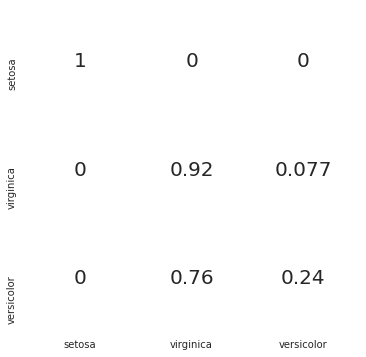

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Creating the normalized confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1),normalize='true')

from matplotlib.colors import ListedColormap
df_cm = pd.DataFrame(cm, index = ['setosa','virginica','versicolor'],
                  columns = ['setosa','virginica','versicolor'])

plt.figure(figsize = (6,6))

with sns.axes_style('white'):
    sns.heatmap(df_cm,
                cbar=False,
                square=False,
                annot=True,
                annot_kws={"size": 20},
                cmap=ListedColormap(['white']),
                linewidths=0.5)
    sns.set(font_scale=1.8)

In [25]:
def input_test_seq():
    sepal_length = float(input('Enter the Sepal length in cm : '))
    while True:
        if float(sepal_length)< 0 or float(sepal_length) > 10:
            print('Inalid Entry. Enter Sepal Length <10 \n')
            sepal_length = float(input('Enter the sepal length in cm :'))
            continue
        else:
            break

    sepal_width = float(input('Enter the Sepal width in cm :'))
    while True:
        if float(sepal_width) < 0 or float(sepal_width) > 10:
            print('Invalid entry')
            sepal_width = float(input('Enter the sepal width in cm :'))
            continue
        else:
            break

    petal_length = float(input('Enter the petal length in cm :'))
    while True:
        if float(petal_length) <0 or float(petal_length) > 10:
            print('Inalid Entry. Please enter value less than 10')
            petal_length = float(input('Enter the petal length in cm :'))
            continue
        else:
            break

    petal_width = float(input('Enter the petal width in cm :'))
    while True:
        if float(petal_width) < 0 or float(petal_width) > 10:
            print('Invalid entry')
            petal_width = float(input('Enter the petal width in cm :'))
            continue
        else:
            break
    '''
    result_category = predict(
        {'sepal_length': sepal_length, 'sepal_width': sepal_width,
         'petal_length': petal_length, 'petal_width': petal_width}, tree, 1.0)
    '''
    predict_features = [sepal_length,sepal_width,petal_length,petal_width]
    
    predict_features = normalize(predict_features)
    
    result_category = classifier.predict(predict_features)
    
    result_category = result_category.argmax(axis=1)[0]
    
    if result_category == 0:
        value_prediction = "Iris-setosa"
    elif result_category == 1:
        value_prediction = "Iris-versicolor"
    elif result_category == 2:
        value_prediction = "Iris-virginica"
    return value_prediction


flower_prediction = input_test_seq()
print("The flower is most likely", flower_prediction)

Enter the Sepal length in cm : 5.1
Enter the Sepal width in cm :3.4
Enter the petal length in cm :1.4
Enter the petal width in cm :0.2


'Iris-versicolor'